In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from tqdm import tqdm
from functools import reduce

In [3]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

In [4]:
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [5]:
from utils.geometrics import haversine_distance

In [6]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [7]:
df_master_table = pd.read_parquet('../data/02_intermediate/master_table.parquet')
df_master_table.head()

,station_id,date_ref,n_rents,duration_mean,duration_min,duration_sum,distance_mean,distance_median,distance_p5,distance_p99,...,rainfall_sum_w2,rainfall_sum_w3,rainfall_sum_w7,rainfall_sum_w15,rainfall_sum_w30,rainfall_sum_w60,rainfall_sum_w90,rainfall_sum_trend,target_bruto,target
0,3183,2015-09-21,29,12.034483,2,349,1.045365,0.890791,3.563407,3.563407,...,1251.800049,1247.400024,1227.699951,1225.199951,1195.599976,1179.0,1077.400024,-1.739291,2.206897,1
1,3183,2015-09-22,64,9.843750,2,630,1.287667,1.229751,3.984896,3.984896,...,1251.800049,1247.400024,1227.699951,1225.199951,1195.599976,1179.0,1077.400024,-1.739291,0.937500,0
2,3183,2015-09-23,60,12.850000,2,771,1.095387,0.894698,3.820818,3.820818,...,1251.800049,1247.400024,1227.699951,1225.199951,1195.599976,1179.0,1077.400024,-1.739291,0.850000,0
3,3183,2015-09-24,51,9.196078,2,469,1.008318,0.666205,3.320056,3.320056,...,1251.800049,1247.400024,1227.699951,1225.199951,1195.599976,1179.0,1077.400024,-1.739291,0.901961,0
4,3183,2015-09-25,46,11.652174,2,536,1.111958,1.224425,3.320056,3.320056,...,1251.800049,1247.400024,1227.699951,1225.199951,1195.599976,1179.0,1077.400024,-1.739291,1.282609,1


<Axes: title={'center': 'target by date_ref'}, xlabel='date_ref'>

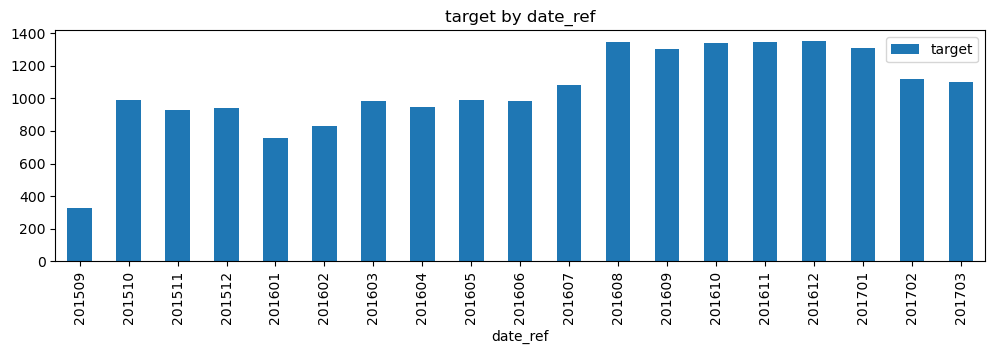

In [13]:
(
    df_master_table
    .astype({'date_ref': 'datetime64[ns]'})
    .eval('date_ref = date_ref.dt.strftime("%Y%m")')
    .groupby('date_ref')
    .agg(target=('target', 'count'))
    .plot(figsize=(12, 3), title='target by date_ref', kind='bar')
)